<a href="https://colab.research.google.com/github/suhanigajre/customer-segmentation-clustering/blob/main/notebook/Project2_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers_5.csv to Mall_Customers_5.csv


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Mall_Customers_5.csv")

# View first 5 rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,42,69,93
1,2,Male,35,129,34
2,3,Female,47,89,65
3,4,Male,58,66,98
4,5,Male,41,61,23


In [3]:
# Check data structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              50 non-null     int64 
 1   Gender                  50 non-null     object
 2   Age                     50 non-null     int64 
 3   Annual Income (k$)      50 non-null     int64 
 4   Spending Score (1-100)  50 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [4]:
# Summary statistics for numeric columns
df.describe()



,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,50.00000,50.000000,50.000000,50.00000
mean,25.50000,40.700000,73.320000,51.62000
std,14.57738,11.822238,34.434463,30.52927
min,1.00000,20.000000,15.000000,1.00000
25%,13.25000,32.000000,44.000000,22.25000
50%,25.50000,39.000000,73.500000,58.00000
75%,37.75000,52.000000,102.000000,76.00000
max,50.00000,60.000000,135.000000,100.00000


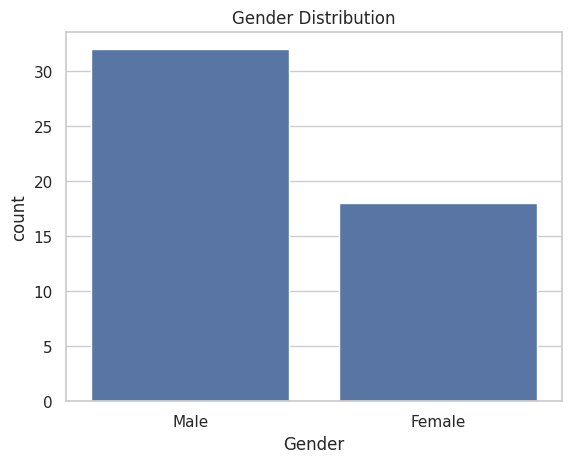

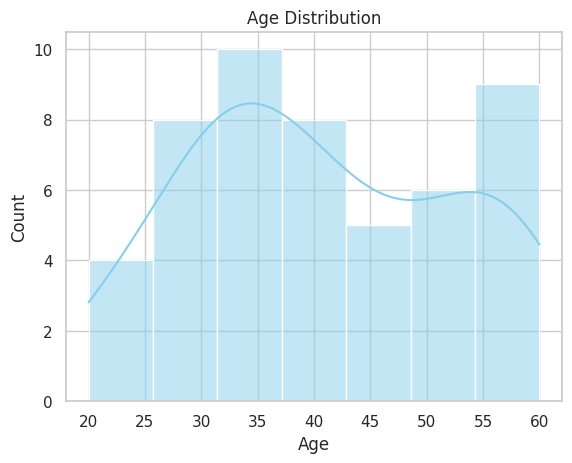

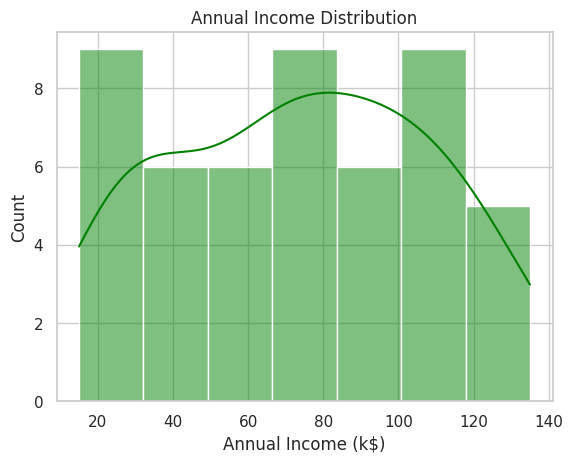

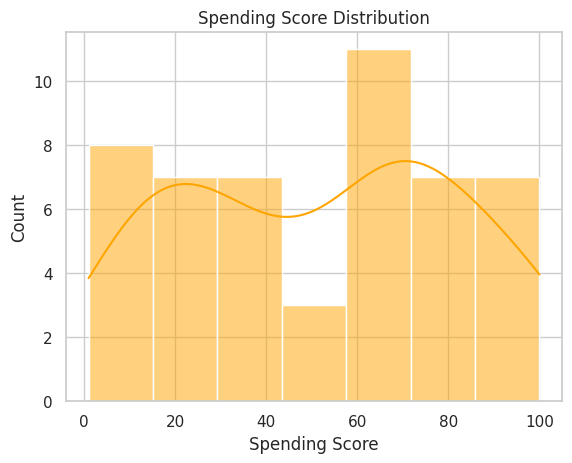

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# 1. Gender Distribution
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

# 2. Age Distribution
sns.histplot(df["Age"], kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 3. Annual Income Distribution
sns.histplot(df["Annual Income (k$)"], kde=True, color="green")
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.show()

# 4. Spending Score Distribution
sns.histplot(df["Spending Score (1-100)"], kde=True, color="orange")
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Count")
plt.show()


In [6]:
# Convert Gender to numerical
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [7]:
# Select the features we want to use in clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)


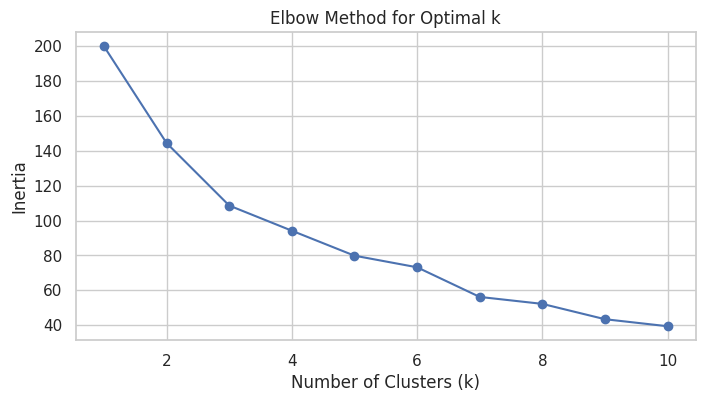

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [10]:
# Apply K-Means with optimal number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Show first few rows with cluster label
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,42,69,93,1
1,2,1,35,129,34,2
2,3,0,47,89,65,3
3,4,1,58,66,98,1
4,5,1,41,61,23,2


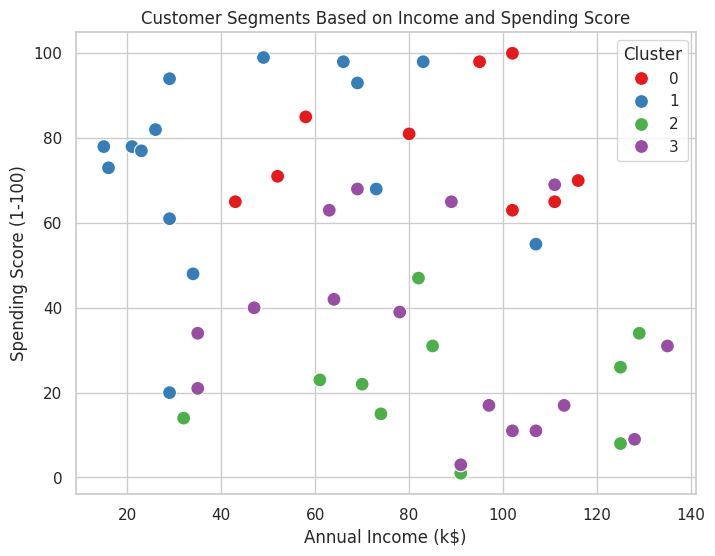

In [11]:
# Visualize clusters: Income vs. Spending Score
plt.figure(figsize=(8, 6))

sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set1',
    s=100
)

plt.title('Customer Segments Based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [12]:
# Group by cluster to analyze average values
df.groupby('Cluster').mean(numeric_only=True)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,22.444444,0.888889,31.444444,84.333333,77.555556
1,27.600000,0.933333,48.933333,44.600000,74.800000
2,20.600000,1.000000,33.100000,87.400000,22.100000
3,28.312500,0.000000,42.937500,85.250000,33.750000


In [13]:
df.groupby('Cluster').mean(numeric_only=True)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,22.444444,0.888889,31.444444,84.333333,77.555556
1,27.600000,0.933333,48.933333,44.600000,74.800000
2,20.600000,1.000000,33.100000,87.400000,22.100000
3,28.312500,0.000000,42.937500,85.250000,33.750000


### Customer Segmentation – Cluster Profiling

Based on the cluster analysis, we identified the following customer segments:

- **Cluster 0** – Premium Shoppers  
  High income and high spending. Mostly male customers. Likely loyal, luxury-seeking buyers.

- **Cluster 1** – Stable Buyers  
  Older male customers with medium income and high spending. Likely consistent shoppers who value quality.

- **Cluster 2** – Cautious Rich Shoppers  
  All male customers with high income but low spending. May be careful or selective buyers.

- **Cluster 3** – Low Engagement Females  
  All female customers with high income but low spending. Possibly need targeted promotions to increase activity.


### 📋 Project Summary – Customer Segmentation Using Clustering

This project used K-Means clustering to segment mall customers based on demographics and behavior. The dataset included Gender, Age, Annual Income, and Spending Score of 50 customers.

We scaled the features and applied the Elbow Method to find the optimal number of clusters (k=4). Clusters were visualized and profiled to understand customer segments.

---

### 📊 Key Clusters Identified:

- **Cluster 0 – Premium Shoppers**: High income, high spending, mostly male  
- **Cluster 1 – Stable Buyers**: Older males, moderate income, high spending  
- **Cluster 2 – Cautious Rich Shoppers**: High income, low spending, selective  
- **Cluster 3 – Low Engagement Females**: High income females, low spending

---

### 💡 Recommendations:

- **Target Cluster 0** with luxury promotions and loyalty offers  
- **Re-engage Cluster 3** (female, low-spenders) with personalized deals or ads  
- **Upsell to Cluster 2** by offering bundles or limited-time offers  
- **Retain Cluster 1** through consistent, quality product experiences

---

### ✅ Tools Used:

- Python (pandas, matplotlib, seaborn, scikit-learn)
- Google Colab (analysis and code)
- GitHub (documentation and version control)
